In [3]:
import random
sys.path.append("../..")
from thesis.utils.env_checker import RewardCheck
from thesis.envs.matrix import Matrix
import numpy as np

In [2]:
env = Matrix(
    model_path = "../../envs/MiniMatrix.zip",
    startport = 51146,
    max_seconds = 5*60,
    fleetsize = 6,
    max_fleetsize = 10,    
    pseudo_dispatcher = True,
    routing_agent_death= True,
    sim_config = dict(
        dispatch = True,
        routing_ma = True,
        dispatching_ma = True,
        reward_reached_target = 0, 
        reward_removed_for_block = 0, 
        reward_invalid=0,
        block_timeout = 20,
        reward_accepted_in_station = 1,
        reward_declined_in_station = -1,
        dispatching_interval=240,
        io_quote = 0.99  ,
        availability = 0.95,
        mttr = 5*60,
    )
)

c:\Users\Wegma\.conda\envs\thesis\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_72198_qveexfyy)
  warn(f"Unzipping to temporary directory ({tmp_dir})")


In [3]:
chk = RewardCheck(env)

In [4]:
chk.run(1, seed = 0)

++++++++++++++++++++
Total Reward: 0; 469 steps taken
Mean Step Time: 0.5147783146229888s ; Max: 224.24502682685852s ; Min: 0.013996362686157227s


In [49]:
env.statistics

{'jobDone': 0.0,
 'newPart': 5.0,
 'dispatch': 42.0,
 'taken_invalid': 1335.0,
 'wrongTarget': 81.0,
 'block': 66.0,
 'targetReached': 17.0}

AGENT 0 --- STEP 27 --- ACTION [2, 0, 0, 1, 2, 3, 0, 3, 2, 0] --- REWARD 0


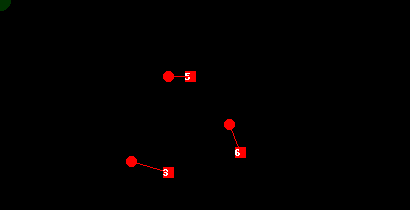

In [7]:
chk.replay("0", 0.5)

AGENT 7 --- STEP 42 --- ACTION [4, 2, 0, 5, 2, 4, 2, 0, 4, 3] --- REWARD 0


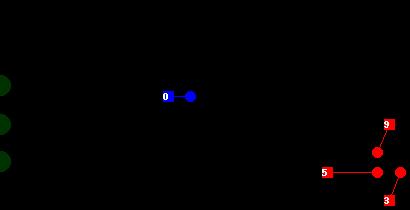

[('3', 12),
 ('3', 24),
 ('7', 38),
 ('14', 50),
 ('25', 65),
 ('30', 2),
 ('36', 1),
 ('49', 0),
 ('51', 51),
 ('51', 68),
 ('51', 110),
 ('52', 24),
 ('54', 24),
 ('62', 0),
 ('63', 0)]

In [57]:
chk.get_reward_situations(reward_above = 0.5, reward_below = 1.5, play_random = True)

In [30]:
chk.plot("6")